In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Notebook/3667195.csv",index_col="DATE")
print(data)

                STATION                           NAME  ACMH   ACSH   AWND  \
DATE                                                                         
1970-01-01  USW00024233  SEATTLE TACOMA AIRPORT, WA US  90.0  100.0    NaN   
1970-01-02  USW00024233  SEATTLE TACOMA AIRPORT, WA US  80.0   40.0    NaN   
1970-01-03  USW00024233  SEATTLE TACOMA AIRPORT, WA US  90.0  100.0    NaN   
1970-01-04  USW00024233  SEATTLE TACOMA AIRPORT, WA US  10.0    0.0    NaN   
1970-01-05  USW00024233  SEATTLE TACOMA AIRPORT, WA US  70.0  100.0    NaN   
...                 ...                            ...   ...    ...    ...   
2024-04-15  USW00024233  SEATTLE TACOMA AIRPORT, WA US   NaN    NaN  10.07   
2024-04-16  USW00024233  SEATTLE TACOMA AIRPORT, WA US   NaN    NaN   6.71   
2024-04-17  USW00024233  SEATTLE TACOMA AIRPORT, WA US   NaN    NaN   8.50   
2024-04-18  USW00024233  SEATTLE TACOMA AIRPORT, WA US   NaN    NaN    NaN   
2024-04-19  USW00024233  SEATTLE TACOMA AIRPORT, WA US   NaN    

In [ ]:
print(data.columns)

Index(['STATION', 'NAME', 'ACMH', 'ACSH', 'AWND', 'FMTM', 'PGTM', 'PRCP',
       'PSUN', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF1', 'WDF2',
       'WDF5', 'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM',
       'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'WV01', 'WV03', 'WV20'],
      dtype='object')


In [ ]:
null_pct=data.apply(pd.isnull).sum()/data.shape[0]
print(null_pct*100)

STATION     0.000000
NAME        0.000000
ACMH       50.753794
ACSH       50.743710
AWND       25.810518
FMTM       49.720163
PGTM       31.528261
PRCP        0.035295
PSUN       74.607977
SNOW       22.417183
SNWD       22.250794
TAVG       66.167499
TMAX        0.005042
TMIN        0.005042
TSUN       45.257903
WDF1       99.959663
WDF2       48.822669
WDF5       49.841174
WDFG       55.811022
WDFM       55.095044
WESD       70.160843
WSF1       99.959663
WSF2       48.822669
WSF5       49.841174
WSFG       55.805980
WSFM       55.095044
WT01       54.585791
WT02       92.653658
WT03       98.336106
WT04       99.319316
WT05       97.357939
WT06       99.848737
WT07       99.884032
WT08       92.759542
WT09       99.667221
WT11       99.984874
WT13       86.754399
WT14       94.191499
WT15       99.984874
WT16       57.353905
WT17       99.878990
WT18       96.949529
WT19       99.919326
WT21       99.460495
WT22       99.692432
WV01       99.949579
WV03       99.974789
WV20       99

In [ ]:
valid_cols=data.columns[null_pct<=0.25]

In [ ]:
valid_cols

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
data=data[valid_cols].copy()
data.columns=data.columns.str.lower()
print(data.head())

                station                           name  prcp  snow  snwd  \
DATE                                                                       
1970-01-01  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
1970-01-02  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
1970-01-03  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
1970-01-04  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
1970-01-05  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   

            tmax  tmin  
DATE                    
1970-01-01  42.0  35.0  
1970-01-02  44.0  34.0  
1970-01-03  41.0  33.0  
1970-01-04  40.0  29.0  
1970-01-05  41.0  30.0  


In [ ]:
data=data.ffill()

In [ ]:
null_pct=data.apply(pd.isnull).sum()/data.shape[0]
print(null_pct)

station    0.0
name       0.0
prcp       0.0
snow       0.0
snwd       0.0
tmax       0.0
tmin       0.0
dtype: float64


In [ ]:
data.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax       float64
tmin       float64
dtype: object

In [ ]:
data.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-13', '2024-04-14',
       '2024-04-15', '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19'],
      dtype='object', name='DATE', length=19833)

In [ ]:
data.index=pd.to_datetime(data.index)

In [ ]:
data.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-13',
               '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17',
               '2024-04-18', '2024-04-19'],
              dtype='datetime64[ns]', name='DATE', length=19833, freq=None)

In [ ]:
data.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    110
Name: count, dtype: int64

<Axes: xlabel='DATE'>

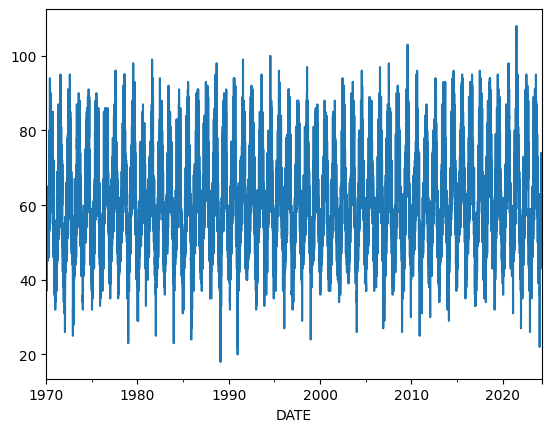

In [ ]:
data["tmax"].plot()

In [ ]:
data["target"]=data.shift(-1)["tmax"]

In [ ]:
data

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,42.0,35.0,44.0
1970-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,44.0,34.0,41.0
1970-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,33.0,40.0
1970-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,40.0,29.0,41.0
1970-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,30.0,44.0
...,...,...,...,...,...,...,...,...
2024-04-15,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,56.0,44.0,54.0
2024-04-16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,54.0,40.0,59.0
2024-04-17,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,59.0,36.0,64.0


In [ ]:
data=data.ffill()

In [ ]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=.1)

In [ ]:
predictors=data.columns[~data.columns.isin(["target","name","station"])]

In [ ]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [ ]:
def backtest(data,model,predictors,start=8000,step=50):
  all_predictors=[]
  for i in range(start,data.shape[0],step):
    train=data.iloc[:i,:]
    test=data.iloc[i:(i+step),:]
    model.fit(train[predictors],train["target"])
    pred=model.predict(test[predictors])
    pred=pd.Series(pred,index=test.index)
    combined=pd.concat([test["target"],pred],axis=1)
    combined.columns=["actual","prediction"]
    combined["diff"]=(combined["actual"]-combined["prediction"]).abs()
    all_predictors.append(combined)
  return pd.concat(all_predictors)

In [ ]:
predictions=backtest(data,rr,predictors)

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
1991-11-27,51.0,47.870833,3.129167
1991-11-28,47.0,51.381003,4.381003
1991-11-29,42.0,47.222871,5.222871
1991-11-30,51.0,43.488357,7.511643
1991-12-01,48.0,51.858597,3.858597
...,...,...,...
2024-04-15,54.0,56.990382,2.990382
2024-04-16,59.0,54.478859,4.521141
2024-04-17,64.0,57.196508,6.803492


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.000565342037101

In [ ]:
pd.Series(rr.coef_, index=predictors)

prcp   -2.404725
snow   -0.280793
snwd   -0.012405
tmax    0.747025
tmin    0.254369
dtype: float64

<Axes: xlabel='DATE'>

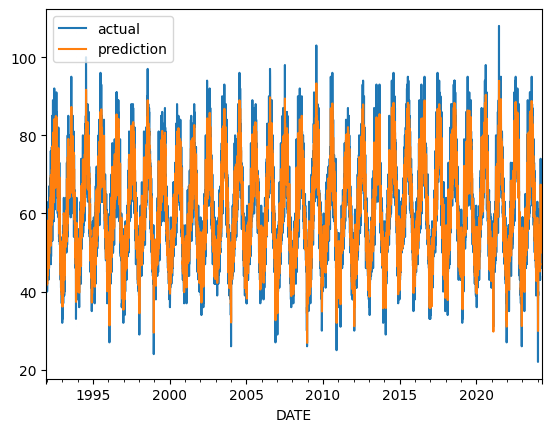

In [ ]:
predictions[["actual", "prediction"]].plot()

In [ ]:
def pctdiff(old,new):
  return (new-old)/old
def compute_rolling(data,horizon,col):
  label=f"rolling_{horizon}_{col}"
  data[label] = data[col].rolling(horizon).mean()
  data[f"{label}_pct"]=pctdiff(data[label],data[col])
  return data
rolling_horizon=[3,14]
for h in rolling_horizon:
  for col in ["tmax","tmin","prcp"]:
    data=compute_rolling(data,h,col)


In [ ]:
data

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,42.0,35.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,44.0,34.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,33.0,40.0,42.333333,-0.031496,34.000000,-0.029412,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,40.0,29.0,41.0,41.666667,-0.040000,32.000000,-0.093750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,30.0,44.0,40.666667,0.008197,30.666667,-0.021739,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,56.0,44.0,54.0,61.333333,-0.086957,43.000000,0.023256,0.0,NaN,55.785714,0.003841,42.571429,0.033557,0.028571,-1.0
2024-04-16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,54.0,40.0,59.0,58.333333,-0.074286,42.333333,-0.055118,0.0,NaN,54.857143,-0.015625,42.214286,-0.052453,0.027143,-1.0
2024-04-17,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,59.0,36.0,64.0,56.333333,0.047337,40.000000,-0.100000,0.0,NaN,55.285714,0.067183,41.785714,-0.138462,0.027143,-1.0


In [ ]:
data=data.iloc[14:,:]

In [ ]:
data

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,40.0,32.0,37.0,47.333333,-0.154930,36.333333,-0.119266,0.750000,-1.000000,43.285714,-0.075908,33.928571,-0.056842,0.192143,-1.000000
1970-01-16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.01,0.0,0.0,37.0,33.0,45.0,43.000000,-0.139535,34.666667,-0.048077,0.210000,-0.952381,42.785714,-0.135225,33.857143,-0.025316,0.192857,-0.948148
1970-01-17,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.54,0.0,0.0,45.0,35.0,52.0,40.666667,0.106557,33.333333,0.050000,0.183333,1.945455,43.071429,0.044776,34.000000,0.029412,0.231429,1.333333
1970-01-18,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.69,0.0,0.0,52.0,45.0,52.0,44.666667,0.164179,37.666667,0.194690,0.413333,0.669355,43.928571,0.183740,35.142857,0.280488,0.280714,1.458015
1970-01-19,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.67,0.0,0.0,52.0,46.0,55.0,49.666667,0.046980,42.000000,0.095238,0.633333,0.057895,44.714286,0.162939,36.285714,0.267717,0.328571,1.039130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,56.0,44.0,54.0,61.333333,-0.086957,43.000000,0.023256,0.000000,NaN,55.785714,0.003841,42.571429,0.033557,0.028571,-1.000000
2024-04-16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,54.0,40.0,59.0,58.333333,-0.074286,42.333333,-0.055118,0.000000,NaN,54.857143,-0.015625,42.214286,-0.052453,0.027143,-1.000000
2024-04-17,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,59.0,36.0,64.0,56.333333,0.047337,40.000000,-0.100000,0.000000,NaN,55.285714,0.067183,41.785714,-0.138462,0.027143,-1.000000


In [ ]:
data=data.fillna(0)

In [ ]:
def expandmean(data):
  return data.expanding(1).mean()
for col in["tmax","tmin","prcp"]:
  data[f"monthavg_{col}"]=data[col].groupby(data.index.month,group_keys=False).apply(expandmean)
  data[f"day_avg_{col}"] = data[col].groupby(data.index.day_of_year, group_keys=False).apply(expandmean)

In [ ]:
data

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,monthavg_tmax,day_avg_tmax,monthavg_tmin,day_avg_tmin,monthavg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,40.0,32.0,37.0,47.333333,-0.154930,...,33.928571,-0.056842,0.192143,-1.000000,40.000000,40.000000,32.000000,32.000000,0.000000,0.000000
1970-01-16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.01,0.0,0.0,37.0,33.0,45.0,43.000000,-0.139535,...,33.857143,-0.025316,0.192857,-0.948148,38.500000,37.000000,32.500000,33.000000,0.005000,0.010000
1970-01-17,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.54,0.0,0.0,45.0,35.0,52.0,40.666667,0.106557,...,34.000000,0.029412,0.231429,1.333333,40.666667,45.000000,33.333333,35.000000,0.183333,0.540000
1970-01-18,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.69,0.0,0.0,52.0,45.0,52.0,44.666667,0.164179,...,35.142857,0.280488,0.280714,1.458015,43.500000,52.000000,36.250000,45.000000,0.310000,0.690000
1970-01-19,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.67,0.0,0.0,52.0,46.0,55.0,49.666667,0.046980,...,36.285714,0.267717,0.328571,1.039130,45.200000,52.000000,38.200000,46.000000,0.382000,0.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,56.0,44.0,54.0,61.333333,-0.086957,...,42.571429,0.033557,0.028571,-1.000000,58.033028,58.218182,42.290520,42.763636,0.092557,0.094364
2024-04-16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,54.0,40.0,59.0,58.333333,-0.074286,...,42.214286,-0.052453,0.027143,-1.000000,58.030562,57.945455,42.289120,42.290909,0.092500,0.079818
2024-04-17,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,59.0,36.0,64.0,56.333333,0.047337,...,41.785714,-0.138462,0.027143,-1.000000,58.031155,57.727273,42.285278,42.454545,0.092443,0.068364


In [ ]:
predictors=data.columns[~data.columns.isin(["target","name","station"])]

In [ ]:
predictions=backtest(data,rr,predictors)

In [ ]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

3.7709229411224485

In [ ]:
pd.Series(rr.coef_, index=predictors)

prcp                    0.992555
snow                   -0.750496
snwd                   -0.047163
tmax                    0.781699
tmin                   -0.087063
rolling_3_tmax         -0.352972
rolling_3_tmax_pct    -15.552628
rolling_3_tmin          0.095857
rolling_3_tmin_pct      7.595426
rolling_3_prcp         -1.947363
rolling_3_prcp_pct     -0.393278
rolling_14_tmax         0.231299
rolling_14_tmax_pct     6.388605
rolling_14_tmin         0.083919
rolling_14_tmin_pct     4.413279
rolling_14_prcp        -0.761404
rolling_14_prcp_pct    -0.085480
monthavg_tmax           0.265407
day_avg_tmax            0.114530
monthavg_tmin          -0.223433
day_avg_tmin            0.037855
monthavg_prcp          -2.320950
day_avg_prcp           -0.457119
dtype: float64

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
1991-12-11,50.0,48.704734,1.295266
1991-12-12,44.0,48.473184,4.473184
1991-12-13,44.0,44.981158,0.981158
1991-12-14,40.0,44.465559,4.465559
1991-12-15,43.0,41.459757,1.540243
...,...,...,...
2024-04-15,54.0,57.121211,3.121211
2024-04-16,59.0,55.318427,3.681573
2024-04-17,64.0,58.025203,5.974797


<Axes: xlabel='DATE'>

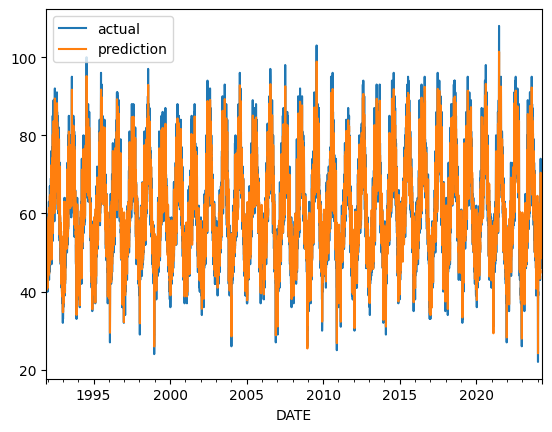

In [ ]:
predictions[["actual", "prediction"]].plot()